### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_scaled
* g) Imbalanced: X_train_scaled_resampled

In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization 

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

# 4) Dimensionality reduction
from sklearn.decomposition import PCA, IncrementalPCA # till 20K features
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection # >20k features
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE # Manifold could be better than Projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # for classfication problems (larg distance between diffrent classes)

# 5) Clustering
from sklearn.cluster import KMeans, MiniBatchKMeans # spherical dataset (n_cluster by (elbow / silhouette_score / silhoutette_samples)) 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN # eps by K-distanceGraph
from sklearn.cluster import HDBSCAN # state of art
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
from chardet import detect
fd = open("OnlineRetail.csv", mode='rb')
detect(fd.read(10000000))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


#### We are going to analysis the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)
---

### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

In [4]:
# a) Understand Columns
df.columns
# InvoiceNo, StockCode, Description, Country are not relevent to customer segmentation

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# b) check dtype -> df[col].astype()
# InvoiceDate -> datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# c) Describe Numerical Cols
df.describe()
# noise => Quantity: -80K, 80K
# UnitPrice: -11k, 38K

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# noise data (remove them)
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315.0,United Kingdom


In [9]:
indices = df[df['Quantity'] <= 0].index
df.drop(indices, axis=0, inplace=True)
indices = df[df['UnitPrice'] <= 0].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [11]:
# > 1000 item? lets see these rows
df[df['Quantity'] > 1000]
# (they are outliers we will handle these outliers in preprocessing)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4799,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-02-12 16:48:00,0.55,15299.0,United Kingdom
4863,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-02-12 17:38:00,0.18,16754.0,United Kingdom
4864,536830,21915,RED HARMONICA IN BOX,1400,2010-02-12 17:38:00,1.06,16754.0,United Kingdom
6273,536890,17084R,ASSORTED INCENSE PACK,1440,2010-03-12 11:48:00,0.16,14156.0,EIRE
16126,537659,22189,CREAM HEART CARD HOLDER,1008,2010-07-12 16:43:00,2.31,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
522127,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-07-12 12:20:00,2.75,15195.0,United Kingdom
523246,581175,23084,RABBIT NIGHT LIGHT,1440,2011-07-12 15:16:00,1.79,14646.0,Netherlands
528291,581458,22197,POPCORN HOLDER,1500,2011-08-12 18:45:00,0.72,17949.0,United Kingdom
528292,581459,22197,POPCORN HOLDER,1200,2011-08-12 18:46:00,0.72,17949.0,United Kingdom


In [12]:
df[df['UnitPrice'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14715,537632,AMAZONFEE,AMAZON FEE,1,2010-07-12 15:08:00,13541.33,NaN,United Kingdom
40527,539856,M,Manual,1,2010-12-22 14:41:00,1298.40,NaN,United Kingdom
114304,546328,M,Manual,1,2011-11-03 10:19:00,1687.17,14911.0,EIRE
114305,546329,M,Manual,1,2011-11-03 10:22:00,1687.17,14911.0,EIRE
116845,546558,M,Manual,1,2011-03-15 09:50:00,2583.76,NaN,Hong Kong
141364,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore
141366,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore
141367,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore
142345,548913,M,Manual,1,2011-05-04 09:45:00,1136.30,12669.0,France
146920,549468,M,Manual,1,2011-08-04 14:27:00,1867.86,17940.0,United Kingdom


In [13]:
# * d) Describe Categorical Cols
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'InvoiceNo' is: 19960
uniques of 'InvoiceNo' is:
['536365' '536366' '536367' ... '581585' '581586' '581587']

**************************************************

number of uniques of 'StockCode' is: 3922
uniques of 'StockCode' is:
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']

**************************************************

number of uniques of 'Description' is: 4026
uniques of 'Description' is:
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'LETTER "U" BLING KEY RING'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

**************************************************

number of uniques of 'Country' is: 38
uniques of 'Country' is:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Isra

In [14]:
for col in cat_cols:
    print(f"count of each unique in column \'{col}\' is:\n{df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

count of each unique in column 'InvoiceNo' is:
573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
574320       1
539081       1
574324       1
566009       1
570725       1
Name: InvoiceNo, Length: 19960, dtype: int64

**************************************************

count of each unique in column 'StockCode' is:
85123A      2265
85099B      2112
22423       2017
47566       1706
20725       1595
            ... 
DCGS0004       1
84705C         1
20964          1
72803b         1
23843          1
Name: StockCode, Length: 3922, dtype: int64

**************************************************

count of each unique in column 'Description' is:
WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
                                      ... 
SET/5 RED SPOTTY LID GLASS BOWLS         1
FRYING PA

In [15]:
# drop unrelevent features as we will use RFM Analysis to make customer segmentation
df.drop(['InvoiceNo', 'StockCode', 'Description', 'Country'], axis=1, inplace=True)

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

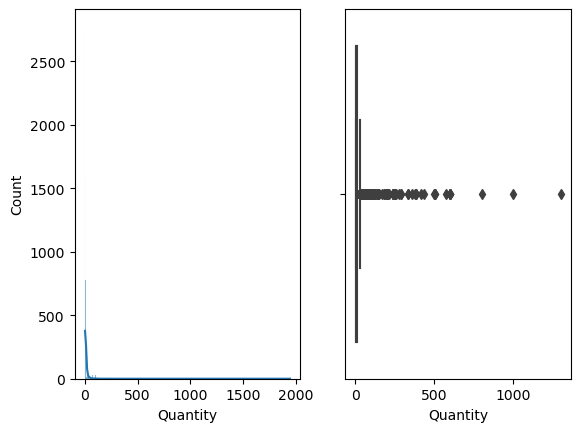

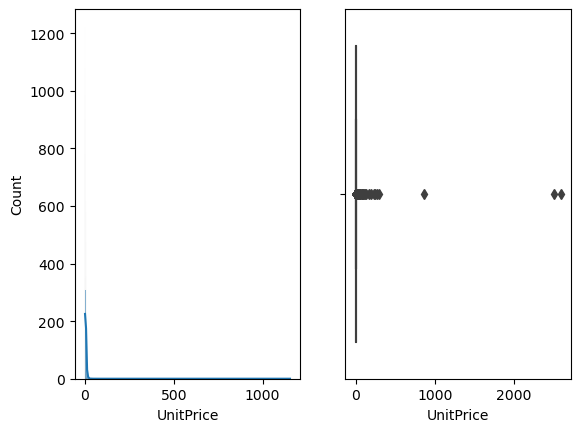

In [16]:
# UniVariate Analysis
num_cols = df.select_dtypes(include="number").columns.drop("CustomerID")
for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col].sample(10000), kde=True, ax=axes[0])
    sns.boxplot(x=df[col].sample(10000), ax=axes[1])
    plt.show()

# Quantity: Right Skewed
# UnitPrice: Right Skewed

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_scaled
* g) Imbalanced: X_train_scaled_resampled

In [17]:
# 1- drop duplicates
# 2- no train test split
df.duplicated().sum()

237170

In [18]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-01-12 08:26:00,2.55,17850.0
1,6,2010-01-12 08:26:00,3.39,17850.0
2,8,2010-01-12 08:26:00,2.75,17850.0
3,2,2010-01-12 08:26:00,7.65,17850.0
4,6,2010-01-12 08:26:00,4.25,17850.0
...,...,...,...,...
292929,8,2011-09-12 12:50:00,1.95,12680.0
292930,4,2011-09-12 12:50:00,4.15,12680.0
292931,12,2011-09-12 12:50:00,0.85,12680.0
292932,6,2011-09-12 12:50:00,2.10,12680.0


In [19]:
# 3- handle NaNs (drop NaN customerIDs)
df.isna().sum()

Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     45617
dtype: int64

In [20]:
indices = df[df.isna()['CustomerID'] == True].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-01-12 08:26:00,2.55,17850.0
1,6,2010-01-12 08:26:00,3.39,17850.0
2,8,2010-01-12 08:26:00,2.75,17850.0
3,2,2010-01-12 08:26:00,7.65,17850.0
4,6,2010-01-12 08:26:00,4.25,17850.0
...,...,...,...,...
247312,8,2011-09-12 12:50:00,1.95,12680.0
247313,4,2011-09-12 12:50:00,4.15,12680.0
247314,12,2011-09-12 12:50:00,0.85,12680.0
247315,6,2011-09-12 12:50:00,2.10,12680.0


In [21]:
df.isna().sum()

Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

### Sinces Outlier columns are not in normal distrbution so cant use IQR 
### and can't use log on them bcz we will extract RFM features
### More Advanced Way we can handle outliers using Anomaly Detection Methods (Isolation Forest)

In [22]:
# Handle Outliers
from sklearn.base import BaseEstimator, TransformerMixin

class Handle_outliers_lb_ub(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1] 
        q1 = np.percentile(X, 25)
        q3 = np.percentile(X, 75)
        iqr = q3 - q1
        ub_train = q3 + 1.5 * iqr
        lb_train = q1 - 1.5 * iqr
        self.ub_train = ub_train
        self.lb_train = lb_train
        return self # always return self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        return X[(X >= self.lb_train) & (X <= self.ub_train)]
         
h_lb_ub = Handle_outliers_lb_ub()
h_lb_ub

Handle_outliers_lb_ub()

In [23]:
def get_outlier_indices(X):
    X_copy = X.copy()
    q1 = np.percentile(X_copy, 25)
    q3 = np.percentile(X_copy, 75)
    iqr = q3 - q1
    ub_train = q3 + 1.5 * iqr
    lb_train = q1 - 1.5 * iqr
    ub_train = ub_train
    lb_train = lb_train
    X_copy = X_copy[(X_copy >= lb_train) & (X_copy <= ub_train)]
    return X_copy

# normal_indices = get_outlier_indices(df["Quantity"]).index
# dff = df.iloc[normal_indices, :]
# dff.reset_index(inplace=True, drop=True)

# normal_indices = get_outlier_indices(dff["UnitPrice"]).index
# dff = dff.iloc[normal_indices, :]
# dff.reset_index(inplace=True, drop=True)
# dff

In [24]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=150, max_samples='auto', max_features=1.0, contamination='auto', random_state=42)
isolation_forest.fit(df[['Quantity', 'UnitPrice']])
y_pred = isolation_forest.predict(df[['Quantity', 'UnitPrice']])
np.unique(y_pred) # is_inlier=1 and for anomaly(outlier)=-1

array([-1,  1])

In [25]:
df[y_pred == 1].describe()
# all outliers removed thats good

,Quantity,UnitPrice,CustomerID
count,218799.000000,218799.000000,218799.000000
mean,7.860136,2.700231,15330.519586
std,7.675945,2.217847,1708.036088
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13978.000000
50%,5.000000,1.950000,15253.000000
75%,12.000000,3.750000,16830.000000
max,46.000000,10.790000,18287.000000


In [26]:
df = df[y_pred == 1].copy()
df

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-01-12 08:26:00,2.55,17850.0
1,6,2010-01-12 08:26:00,3.39,17850.0
2,8,2010-01-12 08:26:00,2.75,17850.0
3,2,2010-01-12 08:26:00,7.65,17850.0
4,6,2010-01-12 08:26:00,4.25,17850.0
...,...,...,...,...
247312,8,2011-09-12 12:50:00,1.95,12680.0
247313,4,2011-09-12 12:50:00,4.15,12680.0
247314,12,2011-09-12 12:50:00,0.85,12680.0
247315,6,2011-09-12 12:50:00,2.10,12680.0


### 4) Extract RFM Features

In [27]:
# Frequncy (no of transaction)
dff_f = df.groupby(by='CustomerID')[['Quantity']].count().rename(mapper={'Quantity':"frequncy"}, axis=1)
dff_f

,frequncy
CustomerID,
12347.0,107
12348.0,3
12349.0,39
12350.0,8
12352.0,57
...,...
18280.0,8
18281.0,3
18282.0,8


In [28]:
# Monetery (total number of money of all transactions)

df['Total_Price'] = df['Quantity'] * df['UnitPrice']
dff_m = df.groupby(by='CustomerID')[['Total_Price']].sum().rename(mapper={'Total_Price':"monetary"}, axis=1)
dff_m

,monetary
CustomerID,
12347.0,2289.01
12348.0,50.60
12349.0,730.99
12350.0,134.20
12352.0,1004.24
...,...
18280.0,147.90
18281.0,36.84
18282.0,113.13


In [29]:
# Recency (number of days of last purchased)
max_date = df['InvoiceDate'].max()
df['number_of_days_from_last_purchase'] = (max_date - df['InvoiceDate']) / pd.Timedelta(days=1)
dff_r = df.groupby('CustomerID')[['number_of_days_from_last_purchase']].min().rename(mapper={'number_of_days_from_last_purchase':"recency"}, axis=1)
dff_r

,recency
CustomerID,
12347.0,40.204167
12348.0,220.272222
12349.0,19.311111
12350.0,311.054167
12352.0,73.097917
...,...
18280.0,160.310417
18281.0,4.268056
18282.0,216.155556


In [30]:
dff_rf = dff_r.join(dff_f, how='inner')
dff_rf

,recency,frequncy
CustomerID,,
12347.0,40.204167,107
12348.0,220.272222,3
12349.0,19.311111,39
12350.0,311.054167,8
12352.0,73.097917,57
...,...,...
18280.0,160.310417,8
18281.0,4.268056,3
18282.0,216.155556,8


In [31]:
dff_rfm = dff_rf.join(dff_m, how='inner')
dff_rfm

,recency,frequncy,monetary
CustomerID,,,
12347.0,40.204167,107,2289.01
12348.0,220.272222,3,50.60
12349.0,19.311111,39,730.99
12350.0,311.054167,8,134.20
12352.0,73.097917,57,1004.24
...,...,...,...
18280.0,160.310417,8,147.90
18281.0,4.268056,3,36.84
18282.0,216.155556,8,113.13


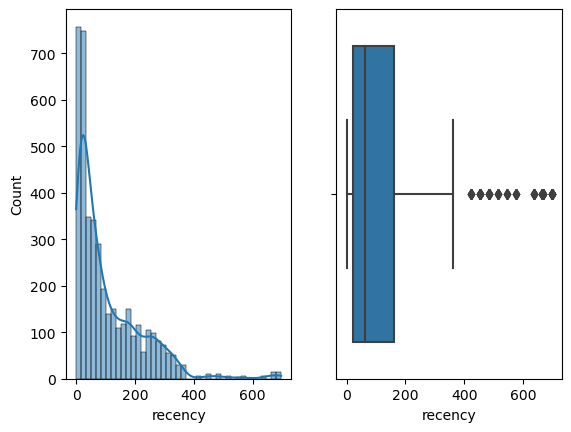

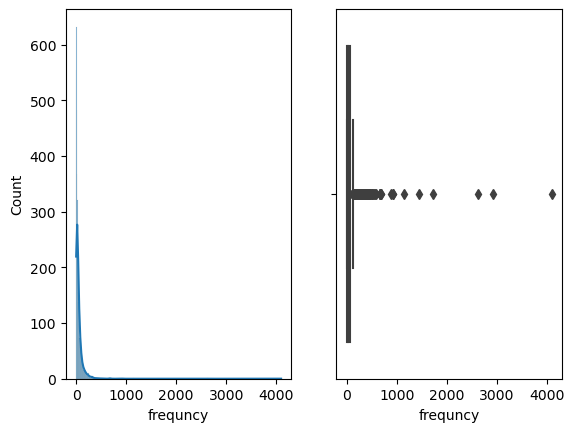

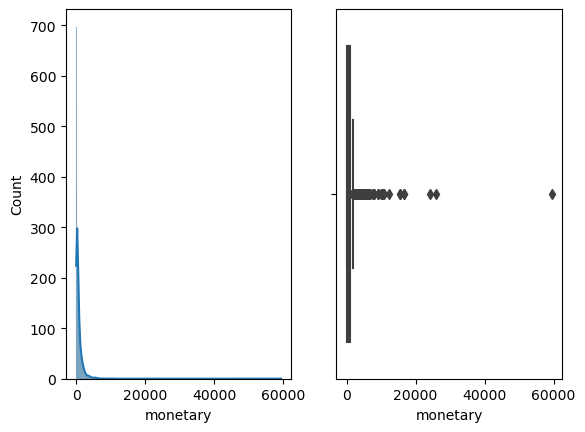

In [32]:
# UniVariate Analysis for RFM Features
num_cols = dff_rfm.select_dtypes(include="number").columns
for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(dff_rfm[col], kde=True, ax=axes[0])
    sns.boxplot(x=dff_rfm[col], ax=axes[1])
    plt.show()

# Quantity: Right Skewed
# UnitPrice: Right Skewed

In [33]:
num_pipe = Pipeline(steps=[
         ('scale', StandardScaler())
         ])
preprocesssing_scaling = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, ['recency', 'frequncy', 'monetary']),
])
rfm_scaled = preprocesssing_scaling.fit_transform(dff_rfm) # will be used in modeling anomaly detection
rfm_scaled

array([[-0.57426655,  0.46755274,  1.00542674],
       [ 1.00109113, -0.41707866, -0.45833308],
       [-0.75705319, -0.1108601 , -0.01340675],
       ...,
       [ 0.96507574, -0.37454831, -0.41744294],
       [-0.8369335 ,  1.573342  ,  0.07074729],
       [-0.92347252, -0.12787224,  0.05863654]])

# 5) Modeling:

* 1) Visualize TSNE distrbution to take insight about clustering technique

* 2) Try Most Appropraite clustering techniques and analyze their clusters

* 3) Make Classifier train on labeled dataset

* 4) Make Anomaly Detection Algorithm

In [34]:
# 1) Visualize TSNE distrbution to take insight about clustering technique
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=42)
tsne_2d = tsne.fit_transform(rfm_scaled)
px.scatter(x=tsne_2d[:, 0], y=tsne_2d[:, 1])

In [35]:
# 2) Try Most Appropraite clustering techniques and analyze their clusters:
## KMeans(some how spherical points), DBSCAN (Dense points), Gaussian Mixture Models

# a) KMeans:

* lower boundry clusters: 2
* upper boundry clusters: sqrt(4195 / 2) = 45 Clusters (we will set it to 11)

In [36]:
# upper boundry clusters
np.sqrt(rfm_scaled.shape[0] / 2)

45.8530260724415

#### to determine appropriate n_cluster

* 1) intertia (within cluster sum of square distance to centroid) 

* 2) silhouette score

* 3) silhouette samples 

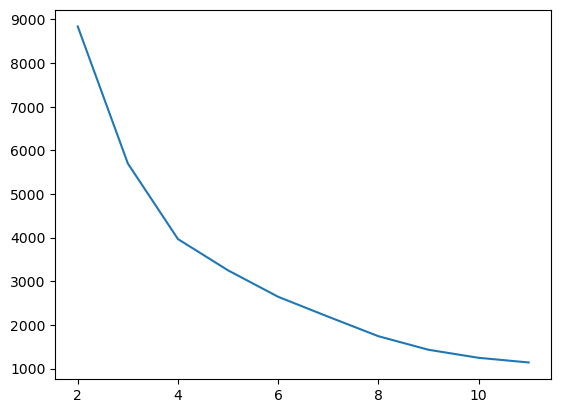

In [37]:
# 1) intertia (within cluster sum of square distance to centroid) 

inertias = []
k_range = range(2, 12)
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++', n_init=10)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(k_range, inertias)

In [38]:
from kneed import KneeLocator
knee_point = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
knee_point.knee

4

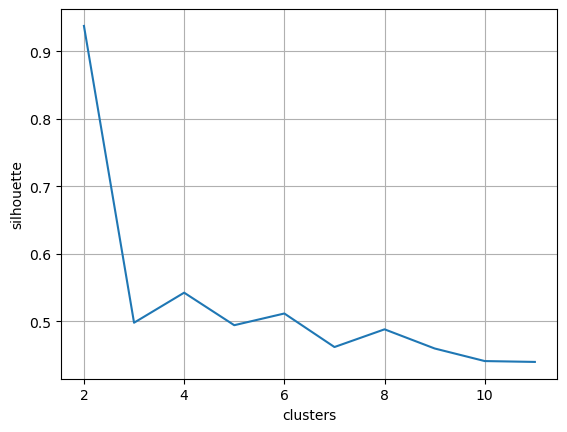

In [39]:
# 2) silhouette score
n_clusters = range(2, 12)
clustering_models = []
silhouette_values = []
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_model.fit(rfm_scaled)
    silhouette_values.append(silhouette_score(rfm_scaled, kmeans_model.labels_))
    clustering_models.append(kmeans_model)

plt.plot(n_clusters, silhouette_values)
plt.xlabel("clusters")
plt.ylabel("silhouette")
plt.grid()
plt.show()
# at n_clusters = 2 largest silhouette but (may be not informative) so second largest silhouette at n=4

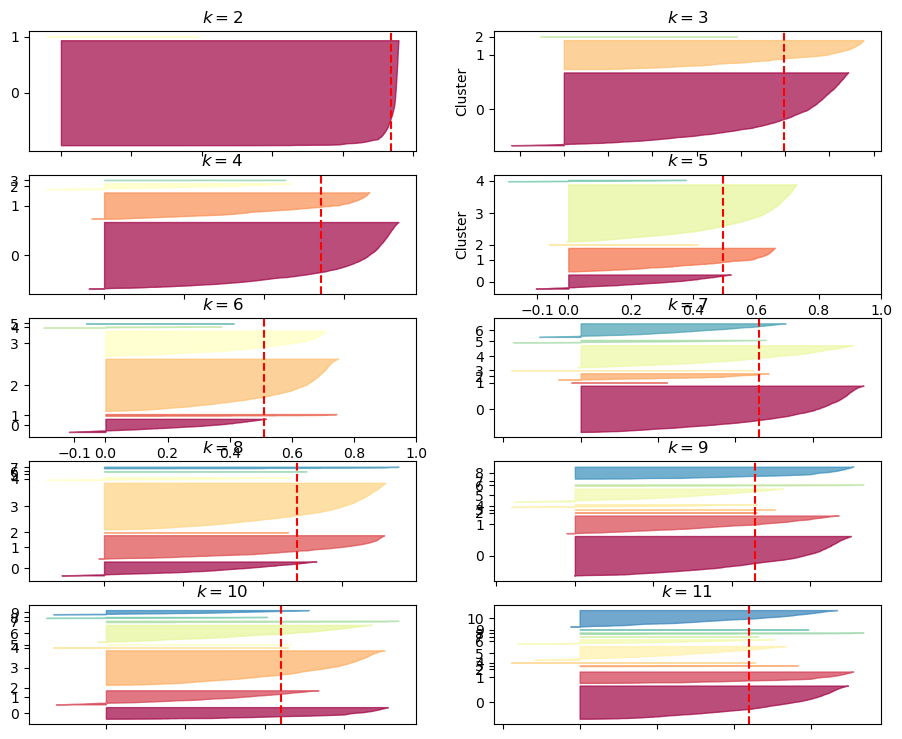

In [40]:
# 3) silhouette samples 

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in range(2, 12):
    plt.subplot(5, 2, k - 1)
    
    y_pred = clustering_models[k - 2].labels_ # 2, 3, 4
    silhouette_coefficients = silhouette_samples(rfm_scaled, y_pred)

    padding = len(rfm_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_values[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

# save_fig("silhouette_analysis_plot")
plt.show()

In [41]:
# at k=4 not all clusters silhouette samples larger than silhouette of whole data
# but at larger k>8 all clusters sizes are good and above avg
# so good start to try: k=4 & above 8 then alayze each cluster 

# b) DBSCAN

0.8961112985425034

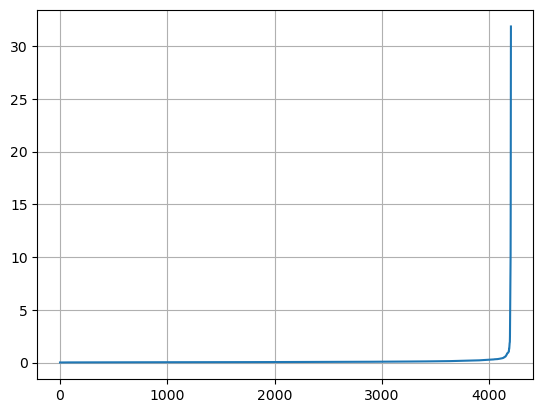

In [42]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

knn = NearestNeighbors(n_neighbors=6) # min_pts = 2 * dimensions
knn.fit(rfm_scaled)
X_dist, X_indices = knn.kneighbors(rfm_scaled, n_neighbors=6) # 6th neighbor
dist_neighbor = sorted(X_dist[:, 5])
plt.plot(dist_neighbor)
plt.grid()
elbow_idx = KneeLocator(x=range(len(dist_neighbor)), y=dist_neighbor, curve='convex', direction='increasing').elbow
dist_neighbor[elbow_idx]

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=6) # all points at eps=0.7 in 2 clusters only [let's try smaller value]
dbscan.fit(rfm_scaled)

DBSCAN(min_samples=6)

In [44]:
np.unique(dbscan.labels_) 

array([-1,  0,  1,  2], dtype=int64)

In [45]:
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++', random_state=42)
kmeans.fit(rfm_scaled)
dff_rfm['kmeans_Cluster'] = kmeans.labels_
dff_rfm['dbscan_Cluster'] = dbscan.labels_
dff_rfm

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
CustomerID,,,,,
12347.0,40.204167,107,2289.01,0,0
12348.0,220.272222,3,50.60,1,0
12349.0,19.311111,39,730.99,0,0
12350.0,311.054167,8,134.20,1,0
12352.0,73.097917,57,1004.24,0,0
...,...,...,...,...,...
18280.0,160.310417,8,147.90,1,0
18281.0,4.268056,3,36.84,0,0
18282.0,216.155556,8,113.13,1,0


In [46]:
dff_rfm['dbscan_Cluster'].value_counts()

 0    4085
-1      46
 1      40
 2      34
Name: dbscan_Cluster, dtype: int64

In [47]:
dff_rfm['kmeans_Cluster'].value_counts()

0    2834
1    1119
2     249
3       3
Name: kmeans_Cluster, dtype: int64

In [48]:
dff_rfm.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
count,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000
mean,105.844537,52.033056,751.491863,0.386683,0.014744
std,114.316560,117.577070,1529.401320,0.599963,0.229324
min,0.000000,1.000000,2.900000,0.000000,-1.000000
25%,22.215278,11.000000,165.570000,0.000000,0.000000
50%,61.050694,26.000000,363.630000,0.000000,0.000000
75%,162.288194,58.000000,846.570000,1.000000,0.000000
max,697.309722,4095.000000,59453.360000,3.000000,2.000000


In [49]:
cluster_0 = dff_rfm[dff_rfm['dbscan_Cluster'] == 0] # recent_customers
cluster_0.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
count,4085.000000,4085.000000,4085.000000,4085.000000,4085.0
mean,97.926102,45.497430,673.350635,0.357650,0.0
std,94.996582,55.269727,842.967864,0.576744,0.0
min,0.000000,1.000000,2.900000,0.000000,0.0
25%,22.256250,11.000000,169.170000,0.000000,0.0
50%,60.188889,26.000000,366.860000,0.000000,0.0
75%,156.279861,57.000000,834.050000,1.000000,0.0
max,363.265278,433.000000,6714.970000,2.000000,0.0


In [50]:
cluster_1 = dff_rfm[dff_rfm['dbscan_Cluster'] == 1] # old_customers
cluster_1.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
count,40.000000,40.000000,40.000000,40.0,40.0
mean,488.986997,11.525000,133.555500,1.0,1.0
std,49.174419,11.256878,83.344891,0.0,0.0
min,424.081944,1.000000,10.200000,1.0,1.0
25%,454.161285,3.000000,78.625000,1.0,1.0
50%,485.159375,7.500000,127.350000,1.0,1.0
75%,516.162847,18.500000,175.317500,1.0,1.0
max,577.223611,44.000000,376.470000,1.0,1.0


In [51]:
cluster_2 = dff_rfm[dff_rfm['dbscan_Cluster'] == 2] # very old customers
cluster_2.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
count,34.000000,34.000000,34.000000,34.0,34.0
mean,674.899203,12.205882,143.311471,1.0,2.0
std,22.349042,9.600440,84.176636,0.0,0.0
min,638.065278,1.000000,23.850000,1.0,2.0
25%,666.028472,6.000000,76.877500,1.0,2.0
50%,666.318403,9.500000,131.860000,1.0,2.0
75%,697.130035,16.750000,197.360000,1.0,2.0
max,697.309722,37.000000,370.150000,1.0,2.0


In [52]:
cluster_0 = dff_rfm[dff_rfm['kmeans_Cluster'] == 0] # cluster 0: recent members with small freq and their transaction is not so high
cluster_0.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
count,2834.000000,2834.000000,2834.000000,2834.0,2834.0
mean,51.231166,43.202541,632.926077,0.0,0.0
std,40.539379,39.584382,550.307683,0.0,0.0
min,0.000000,1.000000,4.950000,0.0,0.0
25%,18.204340,14.000000,210.255000,0.0,0.0
50%,41.068403,31.000000,453.595000,0.0,0.0
75%,76.190104,60.000000,890.850000,0.0,0.0
max,170.129861,253.000000,2841.430000,0.0,0.0


In [53]:
cluster_1 = dff_rfm[dff_rfm['kmeans_Cluster'] == 1] # cluster 1: non freq customers with low monetery
cluster_1.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
count,1119.000000,1119.000000,1119.000000,1119.0,1119.000000
mean,263.252822,17.966041,246.174290,1.0,0.092940
std,104.231999,18.490115,264.880303,0.0,0.390328
min,150.286111,1.000000,2.900000,1.0,-1.000000
25%,189.143056,7.000000,99.930000,1.0,0.000000
50%,243.260417,13.000000,175.460000,1.0,0.000000
75%,300.073264,22.000000,298.390000,1.0,0.000000
max,697.309722,192.000000,3381.980000,1.0,2.000000


In [54]:
cluster_2 = dff_rfm[dff_rfm['kmeans_Cluster'] == 2] # cluster 2: recent members with large transactions money
cluster_2.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
count,249.000000,249.000000,249.000000,249.0,249.000000
mean,21.293139,267.510040,3977.702129,2.0,-0.156627
std,24.233045,190.218849,2639.373804,0.0,0.364180
min,0.069444,79.000000,1308.340000,2.0,-1.000000
25%,6.239583,169.000000,2570.940000,2.0,0.000000
50%,15.240278,221.000000,3344.040000,2.0,0.000000
75%,24.032639,302.000000,4420.010000,2.0,0.000000
max,190.127778,1718.000000,26013.920000,2.0,0.000000


In [55]:
cluster_3 = dff_rfm[dff_rfm['kmeans_Cluster'] == 3] # cluster 3: very recent high freq & transaction cluster
cluster_3.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster
count,3.000000,3.000000,3.000000,3.0,3.0
mean,1.750926,3216.333333,33464.640000,3.0,-1.0
std,2.754385,775.784979,22822.122071,0.0,0.0
min,0.132639,2626.000000,16690.190000,3.0,-1.0
25%,0.160764,2777.000000,20470.280000,3.0,-1.0
50%,0.188889,2928.000000,24250.370000,3.0,-1.0
75%,2.560069,3511.500000,41851.865000,3.0,-1.0
max,4.931250,4095.000000,59453.360000,3.0,-1.0


In [56]:
px.scatter(x=tsne_2d[:, 0], y=tsne_2d[:, 1], color=dff_rfm['kmeans_Cluster'])

# c) Gaussian Mixture

##### As silhouette used only for spherical clusters, so to determine best n_components for GMM (Gaussian Mixture Model) we ill use bic, aic which determine if the model parameters after training is the best for our model using liklihood

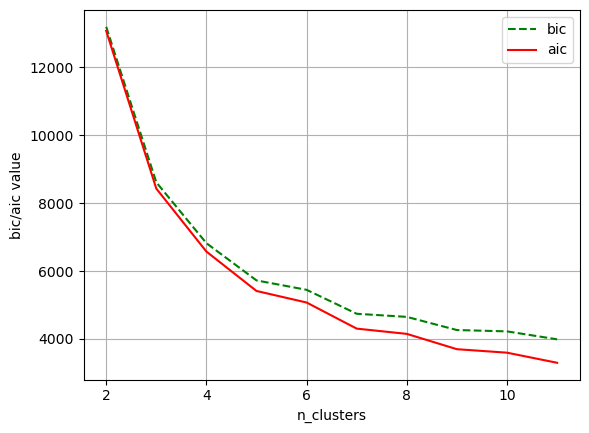

5

In [57]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
bics = []
aics = []
n_components = range(2, 12)
for i in n_components:
    gm = GaussianMixture(n_components=i, max_iter=100, n_init=10, random_state=42)
    gm.fit(rfm_scaled)
    bics.append(gm.bic(rfm_scaled))
    aics.append(gm.aic(rfm_scaled))
plt.plot(n_components, bics, 'g--', label='bic')
plt.plot(n_components, aics, 'r', label='aic')
plt.legend()
plt.xlabel("n_clusters")
plt.ylabel("bic/aic value")
plt.grid()
plt.show()
knee_point = KneeLocator(n_components, aics, curve='convex', direction='decreasing')
knee_point.knee

In [58]:
gm = GaussianMixture(n_components=5, max_iter=100, n_init=10, random_state=42)
gm.fit(rfm_scaled)
# knee at k=5 then it's decrease is not large (so it's the best score)

GaussianMixture(n_components=5, n_init=10, random_state=42)

In [59]:
# or we can use Bayessian to (give small weight for un nessacry clusters) 
bayesian_gm = BayesianGaussianMixture(n_components=11, max_iter=1000, n_init=10, random_state=42)
bayesian_gm.fit(rfm_scaled)

BayesianGaussianMixture(max_iter=1000, n_components=11, n_init=10,
                        random_state=42)

In [60]:
bayesian_gm.weights_ # best n_clusters for this data is 3 (other clusters have small value)

array([0.2085826 , 0.35565324, 0.00052144, 0.05938023, 0.00854025,
       0.08357788, 0.13714876, 0.00132736, 0.01208644, 0.03949293,
       0.09368886])

In [61]:
bayesian_gm = BayesianGaussianMixture(n_components=3, max_iter=1000, n_init=10, random_state=42)
bayesian_gm.fit(rfm_scaled)
np.unique(bayesian_gm.predict(rfm_scaled))

array([0, 1, 2], dtype=int64)

In [62]:
bayesian_gm.weights_

array([0.52018198, 0.39522511, 0.08459291])

# Anomaly Detection for Customers

In [63]:
# Also for anomaly detection customers
densities = bayesian_gm.score_samples(rfm_scaled)
density_threshold_bgmm = np.percentile(densities, 3) # let's say we have 3% outliers customers
anomalies = densities[densities < density_threshold_bgmm]

dff_rfm['bayseian_gmm_clusters'] = bayesian_gm.predict(rfm_scaled)
dff_rfm['bayseian_gmm_clusters'][densities < density_threshold_bgmm] = -1
dff_rfm.describe()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_55568\1577705574.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters
count,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000
mean,105.844537,52.033056,751.491863,0.386683,0.014744,0.477289
std,114.316560,117.577070,1529.401320,0.599963,0.229324,0.664278
min,0.000000,1.000000,2.900000,0.000000,-1.000000,-1.000000
25%,22.215278,11.000000,165.570000,0.000000,0.000000,0.000000
50%,61.050694,26.000000,363.630000,0.000000,0.000000,0.000000
75%,162.288194,58.000000,846.570000,1.000000,0.000000,1.000000
max,697.309722,4095.000000,59453.360000,3.000000,2.000000,2.000000


In [64]:
dff_rfm['bayseian_gmm_clusters'].value_counts()

 0    2220
 1    1582
 2     276
-1     127
Name: bayseian_gmm_clusters, dtype: int64

In [65]:
cluster_1 = dff_rfm[dff_rfm['bayseian_gmm_clusters'] == 0] # cluster 1: not freq users (more than 2 years) with small montery (and small freq)
cluster_1.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.0
mean,144.338514,13.526577,222.415402,0.425225,0.022973,0.0
std,114.715153,8.566876,142.292956,0.494489,0.169601,0.0
min,0.013194,1.000000,2.900000,0.000000,0.000000,0.0
25%,47.232465,7.000000,107.915000,0.000000,0.000000,0.0
50%,119.976389,12.000000,191.185000,0.000000,0.000000,0.0
75%,227.201910,19.000000,311.910000,1.000000,0.000000,0.0
max,666.315972,41.000000,663.100000,1.000000,2.000000,0.0


In [66]:
cluster_2 = dff_rfm[dff_rfm['bayseian_gmm_clusters'] == 1] # cluster 1: Moderate recent with modereate freq & transaction cluster
cluster_2.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.0,1582.0
mean,55.034074,60.334387,905.341752,0.080278,0.0,1.0
std,55.874996,29.647690,555.453110,0.285430,0.0,0.0
min,0.000000,4.000000,62.700000,0.000000,0.0,1.0
25%,16.332986,38.000000,506.610000,0.000000,0.0,1.0
50%,32.084028,53.000000,791.160000,0.000000,0.0,1.0
75%,75.201736,78.000000,1216.300000,0.000000,0.0,1.0
max,273.986111,161.000000,2689.590000,2.000000,0.0,1.0


In [67]:
cluster_3 = dff_rfm[dff_rfm['bayseian_gmm_clusters'] == 2] # cluster 2: very recent high freq & transaction cluster
cluster_3.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.0
mean,17.029214,207.188406,2826.713768,1.420290,-0.036232,2.0
std,12.226298,82.888582,1482.955546,0.909038,0.187206,0.0
min,0.069444,35.000000,503.290000,0.000000,-1.000000,2.0
25%,9.017882,153.000000,1584.865000,0.000000,0.000000,2.0
50%,15.299306,187.500000,2708.430000,2.000000,0.000000,2.0
75%,23.268924,247.000000,3693.177500,2.000000,0.000000,2.0
max,52.229167,537.000000,7763.430000,2.000000,0.000000,2.0


In [68]:
px.scatter(x=tsne_2d[:, 0], y=tsne_2d[:, 1], color=dff_rfm['bayseian_gmm_clusters'])

**Let's Also Invstigate Clusters of Gaussian Mixture and their anomaly detection**

In [69]:
# Also for anomaly detection customers
gm = GaussianMixture(n_components=5, max_iter=100, n_init=10, random_state=42)
gm.fit(rfm_scaled)

densities = gm.score_samples(rfm_scaled)
density_threshold = np.percentile(densities, 3) # let's say we have 3% outliers customers
anomalies = densities[densities < density_threshold]

dff_rfm['gmm_clusters'] = gm.predict(rfm_scaled)
dff_rfm['gmm_clusters'][densities < density_threshold] = -1
dff_rfm.describe()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_55568\4229659287.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters,gmm_clusters
count,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000
mean,105.844537,52.033056,751.491863,0.386683,0.014744,0.477289,1.274673
std,114.316560,117.577070,1529.401320,0.599963,0.229324,0.664278,1.509229
min,0.000000,1.000000,2.900000,0.000000,-1.000000,-1.000000,-1.000000
25%,22.215278,11.000000,165.570000,0.000000,0.000000,0.000000,0.000000
50%,61.050694,26.000000,363.630000,0.000000,0.000000,0.000000,1.000000
75%,162.288194,58.000000,846.570000,1.000000,0.000000,1.000000,3.000000
max,697.309722,4095.000000,59453.360000,3.000000,2.000000,2.000000,4.000000


In [70]:
dff_rfm['gmm_clusters'].value_counts() # this means cluster 2 was outliers (same number of outliers of baysian gmm)

 0    1610
 1    1248
 3     641
 4     579
-1     127
Name: gmm_clusters, dtype: int64

In [71]:
cluster_1 = dff_rfm[dff_rfm['gmm_clusters'] == 0] # cluster 0: not freq users (more than 2 years) with small montery (and small freq)
cluster_1.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters,gmm_clusters
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.0,1610.0
mean,150.365268,10.331056,184.851821,0.453416,0.013665,0.0,0.0
std,107.126071,6.354581,110.185770,0.497980,0.116130,0.0,0.0
min,0.013194,1.000000,2.900000,0.000000,0.000000,0.0,0.0
25%,58.234028,5.000000,98.952500,0.000000,0.000000,0.0,0.0
50%,130.034722,9.000000,166.710000,0.000000,0.000000,0.0,0.0
75%,235.926562,15.000000,255.237500,1.000000,0.000000,0.0,0.0
max,546.279861,30.000000,517.560000,1.000000,1.000000,0.0,0.0


In [72]:
cluster_2 = dff_rfm[dff_rfm['gmm_clusters'] == 1] # cluster 2: Very Freq Users with moderate monetary
cluster_2.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters,gmm_clusters
count,1248.000000,1248.000000,1248.000000,1248.0,1248.0,1248.000000,1248.0
mean,36.627738,39.886218,696.855793,0.0,0.0,0.720353,1.0
std,26.906782,19.797285,416.487847,0.0,0.0,0.449006,0.0
min,0.062500,2.000000,8.760000,0.0,0.0,0.000000,1.0
25%,16.107465,26.000000,398.050000,0.0,0.0,0.000000,1.0
50%,29.046181,36.000000,619.590000,0.0,0.0,1.000000,1.0
75%,54.297917,51.000000,962.797500,0.0,0.0,1.000000,1.0
max,114.354167,98.000000,1999.340000,0.0,0.0,1.000000,1.0


In [73]:
cluster_4 = dff_rfm[dff_rfm['gmm_clusters'] == 3] # cluster 5: not freq with small freq & transaction cluster
cluster_4.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters,gmm_clusters
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.0
mean,194.875138,40.932917,434.893856,0.564743,0.079563,0.477379,3.0
std,126.639547,22.925972,311.357317,0.496178,0.359996,0.604569,0.0
min,0.240278,1.000000,10.200000,0.000000,-1.000000,-1.000000,3.0
25%,120.252778,22.000000,193.350000,0.000000,0.000000,0.000000,3.0
50%,174.053472,37.000000,369.060000,1.000000,0.000000,1.000000,3.0
75%,246.080556,57.000000,587.290000,1.000000,0.000000,1.000000,3.0
max,666.326389,117.000000,1590.060000,1.000000,2.000000,1.000000,3.0


In [74]:
cluster_5 = dff_rfm[dff_rfm['gmm_clusters'] == 4] # cluster 4: very recent low freq & transaction cluster
cluster_5.describe()

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters,gmm_clusters
count,579.000000,579.000000,579.000000,579.000000,579.0,579.000000,579.0
mean,24.174603,136.721934,1916.129827,0.580311,0.0,1.326425,4.0
std,20.693123,58.814650,1060.946838,0.908453,0.0,0.662001,0.0
min,0.000000,15.000000,167.920000,0.000000,0.0,-1.000000,4.0
25%,10.238194,96.000000,1036.910000,0.000000,0.0,1.000000,4.0
50%,18.274306,124.000000,1815.780000,0.000000,0.0,1.000000,4.0
75%,31.131250,169.000000,2450.470000,2.000000,0.0,2.000000,4.0
max,106.222917,340.000000,5355.570000,2.000000,0.0,2.000000,4.0


In [75]:
px.scatter(x=tsne_2d[:, 0], y=tsne_2d[:, 1], color=dff_rfm['gmm_clusters'])

**Clustering Results:**

We Have 2 Resonable Clusters (KMeans & Baysian Gaussain Mixture with ANomaly Detection)

In [76]:
## Using KMeans
# Cluster 0: freq (within half year) with small monetery (and small freq)
# Cluster 1: not freq users (more than 2 years) with small montery (and small freq)
# Cluster 2: freq (within half year) with large monetery (and medium freq)
# Cluster 3: very very freq customers with large monetery (and freq_no_transaction)

## Using BGMM:
# cluster 1: not freq users (more than 2 years) with small montery (and small freq)
# cluster 2: Moderate recent with modereate freq & transaction cluster
# cluster 3: very recent high freq & transaction cluster

**We Can Make Classifier for BGMM Results to detect anomalies**

In [77]:
dff_rfm['class'] = dff_rfm['bayseian_gmm_clusters'] 
dff_rfm['class'] = bayesian_gm.predict(rfm_scaled)
dff_rfm['class'][densities < density_threshold_bgmm] = -1
dff_rfm

C:\Users\ahmed\AppData\Local\Temp\ipykernel_55568\783682520.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters,gmm_clusters,class
CustomerID,,,,,,,,
12347.0,40.204167,107,2289.01,0,0,1,4,1
12348.0,220.272222,3,50.60,1,0,0,0,0
12349.0,19.311111,39,730.99,0,0,1,1,1
12350.0,311.054167,8,134.20,1,0,0,0,0
12352.0,73.097917,57,1004.24,0,0,1,1,1
...,...,...,...,...,...,...,...,...
18280.0,160.310417,8,147.90,1,0,0,0,0
18281.0,4.268056,3,36.84,0,0,0,0,0
18282.0,216.155556,8,113.13,1,0,0,0,0


In [78]:
mapper = {0:'silver_customer', 1:'gold_customer', 2:'platinum_customer', -1:'outlier'}
dff_rfm['class'] = dff_rfm['bayseian_gmm_clusters'].map(mapper)
dff_rfm['class'].value_counts()

silver_customer      2220
gold_customer        1582
platinum_customer     276
outlier               127
Name: class, dtype: int64

In [79]:
X = dff_rfm[dff_rfm['class'] != 'outlier'][['recency', 'frequncy', 'monetary']]
y = dff_rfm[dff_rfm['class'] != 'outlier']['class']
y

CustomerID
12347.0        gold_customer
12348.0      silver_customer
12349.0        gold_customer
12350.0      silver_customer
12352.0        gold_customer
                 ...        
18280.0      silver_customer
18281.0      silver_customer
18282.0      silver_customer
18283.0    platinum_customer
18287.0        gold_customer
Name: class, Length: 4078, dtype: object

In [80]:
X.shape

(4078, 3)

In [81]:
y.value_counts()

silver_customer      2220
gold_customer        1582
platinum_customer     276
Name: class, dtype: int64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_test.shape

((3262, 3), (816, 3))

# 3) Make Classifier train on labeled dataset

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
class LogTransfomer(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):  # always return self
        # calculate what is needed to make .transform()
        # self.mean_ = np.mean(x)
        self.n_features_in_ = x.shape[1] 
        return self # always return self
    
    def transform(self, x, y=None):
        assert self.n_features_in_ == x.shape[1]
        return np.log1p(x)
    
log_transformer = LogTransfomer()
log_transformer

LogTransfomer()

In [84]:
num_pipe = Pipeline(steps=[
         ('outlier', LogTransfomer()),
         ('scale', StandardScaler())
         ])
preprocesssing = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, ['recency', 'frequncy', 'monetary']),
])

X_train_preprocessd = preprocesssing.fit_transform(X_train)
smote = SMOTE(k_neighbors=5, random_state=42)
X_train_preprocessd_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessd, y_train)
y_train_resampled.value_counts()

gold_customer        1776
silver_customer      1776
platinum_customer    1776
Name: class, dtype: int64

In [85]:
pd.DataFrame(X_train_preprocessd_resampled).duplicated().sum() # so k = 5 is enough

0

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_pipe = Imb_Pipeline(steps=[
    ('preprocesssing', preprocesssing),
    ('Smote', SMOTE(k_neighbors=5, random_state=42)), # k=5 is enough
    ('model', GradientBoostingClassifier(n_estimators=1000, n_iter_no_change=10, random_state=42))
])
oversampling_pipe

Pipeline(steps=[('preprocesssing',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('outlier',
                                                                   LogTransfomer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['recency', 'frequncy',
                                                   'monetary'])])),
                ('Smote', SMOTE(random_state=42)),
                ('model',
                 GradientBoostingClassifier(n_estimators=1000,
                                            n_iter_no_change=10,
                                            random_state=42))])

In [87]:
# gb_tree

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocesssing', preprocesssing),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(n_estimators=1000, n_iter_no_change=10, random_state=42))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocesssing', preprocesssing),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(n_estimators=1000, n_iter_no_change=10, random_state=42))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred, average='macro'))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred, average='macro'))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred, average='macro'))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.9987737584304108
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.9812991478687323
Average Valid F1 Score: 0.975813860862402
Average Valid Precsion: 0.9715862676320592
Average Valid Recall: 0.9803591986107106


In [88]:
# it's Very Good Classifier Results No Hyperparameters tunning needed 
# so lets fit on all train data
oversampling_pipe.fit(X_train, y_train) 

Pipeline(steps=[('preprocesssing',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('outlier',
                                                                   LogTransfomer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['recency', 'frequncy',
                                                   'monetary'])])),
                ('Smote', SMOTE(random_state=42)),
                ('model',
                 GradientBoostingClassifier(n_estimators=1000,
                                            n_iter_no_change=10,
                                            random_state=42))])

In [89]:
y_test_pred = oversampling_pipe.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Test precision: {precision_score(y_test, y_test_pred, average='macro')}")
print(f"Test recall: {recall_score(y_test, y_test_pred, average='macro')}")
print(f"Test f1: {f1_score(y_test, y_test_pred, average='macro')}")

Test Accuracy: 0.9779411764705882
Test precision: 0.9510102981414456
Test recall: 0.9781688915758316
Test f1: 0.9637470843019408


**Genarlized Classfiier on Validation and Test Dataset**

---

# 4) Let's Test Our Classifier and test anomaly detection on test points

In [90]:
# for new point, first we will make classification then detect if it's anomaly 
X_new_points = dff_rfm[['recency', 'frequncy', 'monetary']]

densities_new_points = bayesian_gm.score_samples(preprocesssing_scaling.transform(X_new_points))

y_pred_new_points = oversampling_pipe.predict(X_new_points) # predict all values then determine anomaly
y_pred_new_points[densities_new_points < density_threshold_bgmm] = 'outlier' # at 3% of train data will be anomaly

In [91]:
dff_rfm['pred_class'] = y_pred_new_points
dff_rfm

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters,gmm_clusters,class,pred_class
CustomerID,,,,,,,,,
12347.0,40.204167,107,2289.01,0,0,1,4,gold_customer,gold_customer
12348.0,220.272222,3,50.60,1,0,0,0,silver_customer,silver_customer
12349.0,19.311111,39,730.99,0,0,1,1,gold_customer,gold_customer
12350.0,311.054167,8,134.20,1,0,0,0,silver_customer,silver_customer
12352.0,73.097917,57,1004.24,0,0,1,1,gold_customer,gold_customer
...,...,...,...,...,...,...,...,...,...
18280.0,160.310417,8,147.90,1,0,0,0,silver_customer,silver_customer
18281.0,4.268056,3,36.84,0,0,0,0,silver_customer,silver_customer
18282.0,216.155556,8,113.13,1,0,0,0,silver_customer,silver_customer


In [92]:
(dff_rfm['class'] == y_pred_new_points).mean() * 100 # 99.47% of test on all data (data + outliers) accuracy

99.4768133174792

In [93]:
dff_rfm['class'].value_counts()

silver_customer      2220
gold_customer        1582
platinum_customer     276
outlier               127
Name: class, dtype: int64

In [94]:
dff_rfm['pred_class'].value_counts()

silver_customer      2216
gold_customer        1578
platinum_customer     284
outlier               127
Name: pred_class, dtype: int64

In [95]:
dff_rfm[(dff_rfm['class'] == 'outlier') & (dff_rfm['pred_class'] == 'outlier')].shape # all outliers are detected correctly

(127, 9)

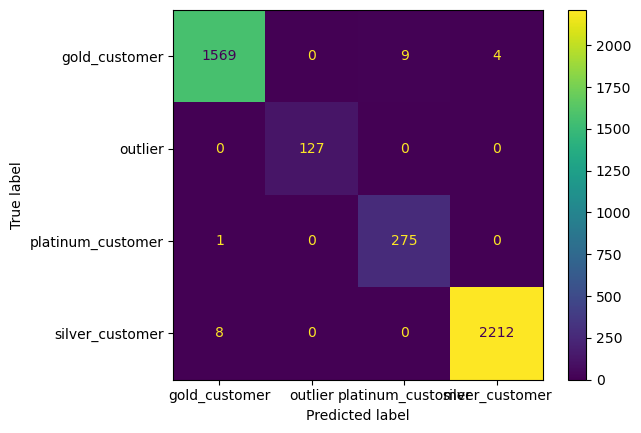

In [96]:
ConfusionMatrixDisplay.from_predictions(y_true=dff_rfm['class'], y_pred=dff_rfm['pred_class'])

In [97]:
def predict_anomaly_then_classify(X_new_points, bayesian_gm, preprocesssing_scaling, density_threshold_bgmm, oversampling_pipe):

    densities_new_points = bayesian_gm.score_samples(preprocesssing_scaling.transform(X_new_points))
    y_pred_new_points = oversampling_pipe.predict(X_new_points) # predict all values then determine anomaly
    y_pred_new_points[densities_new_points < density_threshold_bgmm] = 'outlier' # at 3% of train data will be anomaly
    return y_pred_new_points

In [98]:
X_new_points = dff_rfm[['recency', 'frequncy', 'monetary']]
dff_rfm['pred_class'] = predict_anomaly_then_classify(X_new_points, bayesian_gm, preprocesssing_scaling, density_threshold_bgmm, oversampling_pipe)
dff_rfm

,recency,frequncy,monetary,kmeans_Cluster,dbscan_Cluster,bayseian_gmm_clusters,gmm_clusters,class,pred_class
CustomerID,,,,,,,,,
12347.0,40.204167,107,2289.01,0,0,1,4,gold_customer,gold_customer
12348.0,220.272222,3,50.60,1,0,0,0,silver_customer,silver_customer
12349.0,19.311111,39,730.99,0,0,1,1,gold_customer,gold_customer
12350.0,311.054167,8,134.20,1,0,0,0,silver_customer,silver_customer
12352.0,73.097917,57,1004.24,0,0,1,1,gold_customer,gold_customer
...,...,...,...,...,...,...,...,...,...
18280.0,160.310417,8,147.90,1,0,0,0,silver_customer,silver_customer
18281.0,4.268056,3,36.84,0,0,0,0,silver_customer,silver_customer
18282.0,216.155556,8,113.13,1,0,0,0,silver_customer,silver_customer


# 6) Save Model

In [99]:
import joblib 
import os
os.makedirs('final model')
joblib.dump(bayesian_gm, 'final model/anomaly_detection_gmm.pkl')
joblib.dump(preprocesssing_scaling, 'final model/anomaly_detection_preprocesssing.pkl')
joblib.dump(oversampling_pipe, 'final model/classifier_pipeline.pkl')
joblib.dump(density_threshold_bgmm, 'final model/denisty_threshold_value.pkl')

['final model/denisty_threshold_value.pkl']